In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures
from tsfresh.examples.robot_execution_failures import load_robot_execution_failures

In [2]:
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [23]:
type(y)

pandas.core.series.Series

In [3]:
# y 0则不是failure
# x
# z

timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [9]:
timeseries.describe()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,44.500000,7.000000,-2.345455,8.913636,-128.214394,-39.028030,-4.517424,0.868182
std,25.411399,4.322131,50.367960,45.845475,346.816091,147.269399,101.609308,18.317250
min,1.000000,0.000000,-260.000000,-353.000000,-1547.000000,-672.000000,-646.000000,-137.000000
25%,22.750000,3.000000,-4.000000,-2.000000,-117.250000,-39.250000,-13.000000,-1.000000
50%,44.500000,7.000000,-1.000000,1.000000,46.000000,-9.000000,-3.000000,0.000000
75%,66.250000,11.000000,3.000000,11.000000,60.000000,-1.000000,3.000000,2.000000
max,88.000000,14.000000,342.000000,236.000000,157.000000,686.000000,601.000000,123.000000


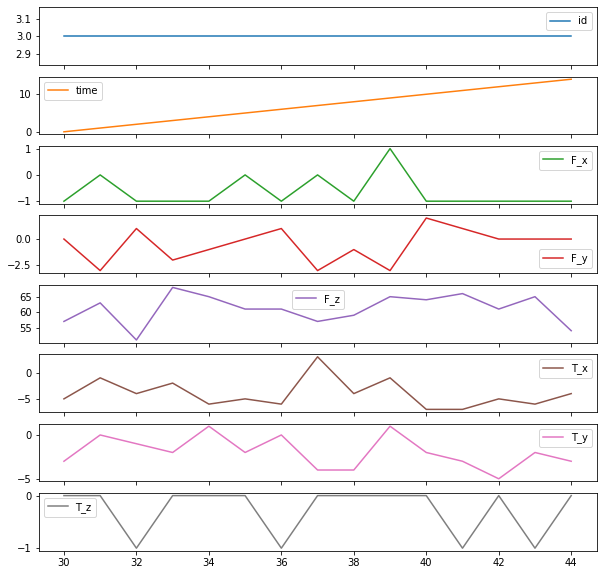

In [4]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

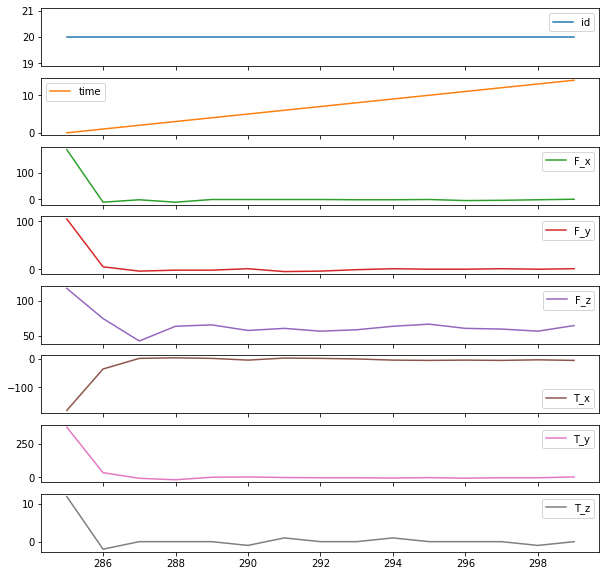

In [5]:
timeseries[timeseries['id'] == 20].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [12]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 88/88 [00:01<00:00, 45.23it/s]


In [7]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/opt/conda/lib/python3.7/site-packages/tsfresh/utilities/dataframe_functions.py:202: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__matrix_profile__feature_"median"__threshold_0.98'
 'T_z__matrix_profile__feature_"25"__threshold_0.98'
 'T_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  RuntimeWarning,


In [20]:
len(extracted_features)

88

In [14]:
features_filtered

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,13.0,0.930949,1.000000,0.222222,...,-0.751682,-0.310265,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,76.0,2.250926,3.000000,4.222222,...,0.057818,-0.202951,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,40.0,1.632993,2.142857,3.128889,...,0.912474,0.539121,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,60.0,2.000000,2.428571,7.128889,...,-0.609735,-2.641390,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,46.0,1.751190,2.285714,4.160000,...,0.072771,0.591927,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,42780.0,53.404120,71.428571,1563.528889,...,71.641254,38.559593,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,1523.0,10.076375,12.142857,14.755556,...,16.349699,14.429645,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,21064.0,37.473546,47.714286,2788.595556,...,71.095480,60.760842,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,308658.0,143.447551,157.285714,6415.715556,...,173.699573,109.029954,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000,0.0,43.2


In [8]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 88/88 [00:01<00:00, 46.85it/s]


In [16]:
features_filtered_direct

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,13.0,0.930949,1.000000,0.222222,...,-0.751682,-0.310265,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,76.0,2.250926,3.000000,4.222222,...,0.057818,-0.202951,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,40.0,1.632993,2.142857,3.128889,...,0.912474,0.539121,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,60.0,2.000000,2.428571,7.128889,...,-0.609735,-2.641390,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,46.0,1.751190,2.285714,4.160000,...,0.072771,0.591927,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,42780.0,53.404120,71.428571,1563.528889,...,71.641254,38.559593,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,1523.0,10.076375,12.142857,14.755556,...,16.349699,14.429645,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,21064.0,37.473546,47.714286,2788.595556,...,71.095480,60.760842,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,308658.0,143.447551,157.285714,6415.715556,...,173.699573,109.029954,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000,0.0,43.2
